In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('whitegrid')
import copy

/Users/ashishbazad/git/portfolio-optimisation-markowitz/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
NUM_TRADING_DAYS = 252
NUM_SIMULATIONS = 10000 * 5

stocks_list = ['YESBANK.NS', 'GRASIM.NS', 'JSWENERGY.NS', 'CIPLA.NS', 'TCS.NS', 'EMAMILTD.NS']
start_date = "2021-05-18"
end_date = "2024-05-18"

In [3]:
stock_data = {}
for stock in stocks_list:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']

stock_prices = pd.DataFrame(stock_data)
stock_prices

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-05-18 00:00:00+05:30,13.350000,1371.365967,113.080093,868.253540,2888.121338,487.685913
2021-05-19 00:00:00+05:30,13.300000,1368.706787,115.082817,887.446533,2881.763428,483.076141
2021-05-20 00:00:00+05:30,13.250000,1354.475098,114.692047,907.326904,2861.192627,475.187225
2021-05-21 00:00:00+05:30,13.350000,1351.126465,114.398964,909.977600,2880.360352,478.941589
2021-05-24 00:00:00+05:30,13.850000,1350.043091,114.203583,914.248108,2881.295898,486.212646
...,...,...,...,...,...,...
2024-05-13 00:00:00+05:30,22.250000,2385.199951,574.400024,1414.650024,3919.313721,518.900024
2024-05-14 00:00:00+05:30,22.549999,2372.050049,599.700012,1357.349976,3873.049805,515.299988
2024-05-15 00:00:00+05:30,22.600000,2369.699951,598.049988,1406.699951,3852.399902,526.900024


In [4]:
NUM_TRADING_DAYS = stock_prices.shape[0]

In [5]:
# Calculateing logarithmic returns
returns_df = stock_prices.copy().reset_index().drop(columns=['Date'])
a = np.array(returns_df).T
log_returns = pd.DataFrame(np.log((a[:, 1:] / a[:, :-1]).T), columns = stock_prices.columns, index = stock_prices.index[1:])
log_returns

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-05-19 00:00:00+05:30,-0.003752,-0.001941,0.017556,0.021865,-0.002204,-0.009497
2021-05-20 00:00:00+05:30,-0.003766,-0.010452,-0.003401,0.022155,-0.007164,-0.016465
2021-05-21 00:00:00+05:30,0.007519,-0.002475,-0.002559,0.002917,0.006677,0.007870
2021-05-24 00:00:00+05:30,0.036769,-0.000802,-0.001709,0.004682,0.000325,0.015067
2021-05-25 00:00:00+05:30,-0.018215,0.003023,0.010213,0.004660,0.015371,-0.023137
...,...,...,...,...,...,...
2024-05-13 00:00:00+05:30,-0.011173,0.003381,0.007251,0.054548,0.013747,-0.007488
2024-05-14 00:00:00+05:30,0.013393,-0.005528,0.043103,-0.041348,-0.011874,-0.006962
2024-05-15 00:00:00+05:30,0.002215,-0.000991,-0.002755,0.035712,-0.005346,0.022262


In [6]:
# Calculating average annual returns

log_returns.mean() * NUM_TRADING_DAYS

YESBANK.NS      0.544711
GRASIM.NS       0.570235
JSWENERGY.NS    1.660850
CIPLA.NS        0.477708
TCS.NS          0.283710
EMAMILTD.NS     0.057287
dtype: float64

In [7]:
# Calculating annual volatility

log_returns.std() / np.sqrt(NUM_TRADING_DAYS)

YESBANK.NS      0.000975
GRASIM.NS       0.000550
JSWENERGY.NS    0.001081
CIPLA.NS        0.000538
TCS.NS          0.000475
EMAMILTD.NS     0.000642
dtype: float64

In [8]:
# Generating random weights and applying markowitz method
portfolio_minimum_weights = [[0.2, 0], [0, 0], [0], [0]]
basket_minimum_weights = [0.4, 0, 0, 0]
portfolio_maximum_weights = [[0.3, 1], [1, 1], [1], [1]]
basket_maximum_weights = [1, 1, 1, 1]
total_minimum_sum = np.sum(basket_minimum_weights)
portfolio_minimum_weights_sum = [np.sum(i) for i in portfolio_minimum_weights]

portfolio_weights = []
portfolio_returns = []
basket_weights = []
portfolio_risks = []

for _ in range(NUM_SIMULATIONS):
    # generating random weights
    tmp_basket_assignment = copy.deepcopy(basket_minimum_weights)
    tmp_weights_assignment = copy.deepcopy(portfolio_minimum_weights)
    left = 1 - total_minimum_sum
    current_basket_weights_sum = 0
    for i in range(len(basket_minimum_weights)):
        if i != len(basket_minimum_weights) - 1:
            tmp_basket_assignment[i] = np.random.uniform(low = basket_minimum_weights[i], high = min(basket_maximum_weights[i], basket_minimum_weights[i] + left))
            current_basket_weights_sum += tmp_basket_assignment[i]
        else:
            tmp_basket_assignment[i] = 1 - current_basket_weights_sum
            if tmp_basket_assignment[i] > basket_maximum_weights[i]:
                excess_weight = tmp_basket_assignment[i] - basket_maximum_weights[i]
                tmp_basket_assignment[i] = basket_maximum_weights[i]
                for k in range(len(basket_minimum_weights)):
                    gap = basket_maximum_weights[k] - tmp_basket_assignment[k]
                    tmp_basket_assignment[k] = min(tmp_basket_assignment[k] + excess_weight, basket_maximum_weights[k])
                    excess_weight = max(0, excess_weight - gap)
                    if excess_weight <= 0:
                        break
        left -= tmp_basket_assignment[i] - basket_minimum_weights[i]

        left_weights = tmp_basket_assignment[i] - portfolio_minimum_weights_sum[i]
        current_portfolio_weights_sum = 0
        for j in range(len(portfolio_minimum_weights[i])):
            if j != len(portfolio_minimum_weights[i]) - 1:
                tmp_weights_assignment[i][j] = np.random.uniform(low = portfolio_minimum_weights[i][j], high = min(portfolio_maximum_weights[i][j], portfolio_minimum_weights[i][j] + left_weights))
                current_portfolio_weights_sum += tmp_weights_assignment[i][j]
            else:
                tmp_weights_assignment[i][j] = tmp_basket_assignment[i] - current_portfolio_weights_sum
                if tmp_weights_assignment[i][j] > portfolio_maximum_weights[i][j]:
                    excess_weight = tmp_weights_assignment[i][j] - portfolio_maximum_weights[i][j]
                    tmp_weights_assignment[i][j] = portfolio_maximum_weights[i][j]
                    for k in range(len(portfolio_minimum_weights[i])):
                        gap = portfolio_maximum_weights[i][k] - tmp_weights_assignment[i][k]
                        tmp_weights_assignment[i][k] = min(tmp_weights_assignment[i][k] + excess_weight, portfolio_maximum_weights[i][k])
                        excess_weight = max(0, excess_weight - gap)
                        if excess_weight == 0:
                            break
            left_weights -= tmp_weights_assignment[i][j] - portfolio_minimum_weights[i][j]
    basket_weights.append(tmp_basket_assignment)
    w = np.array([j for i in tmp_weights_assignment for j in i])
    portfolio_weights.append(w)
        
    # calculating returns
    port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
    portfolio_returns.append(port_return)

    # calculating risks
    port_risks = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
    portfolio_risks.append(port_risks)

In [9]:
# taking IR of govt. issued 10 \-year bonds as risk free rate
risk_free_rate = 0.07

In [10]:
# Creating dataframe for weights, returns, risks, sharpe

portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks

portfolios = pd.DataFrame({"Return" : portfolio_returns, "Risk" : portfolio_risks, "Sharpe" : sharpe_ratios})

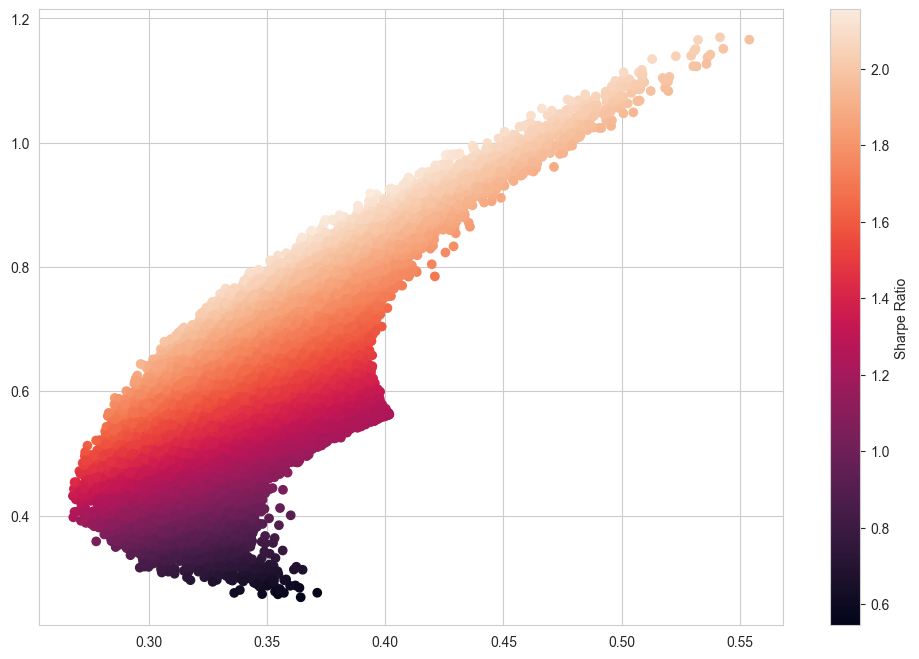

In [11]:
# plotting risk vs return scatterplot

plt.figure(figsize=(12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = sharpe_ratios, marker = 'o')
plt.grid(True)
plt.xlabel = "Expected Risk"
plt.ylabel = "Expected Return"
plt.colorbar(label = "Sharpe Ratio")
plt.show()

In [12]:
# finding out the maximum sharpe ratio

ind = np.argmax(sharpe_ratios)

print("Maximum Sharpe Ratio = ", sharpe_ratios[ind])
print("Corresponding Return = ", portfolio_returns[ind])
print("Corresponding Risk = ", portfolio_risks[ind])

Maximum Sharpe Ratio =  2.1551553540217157
Corresponding Return =  0.9183851042807638
Corresponding Risk =  0.3936538044450485


In [13]:
# corresponding weights for our portfolio with max sharpe

for i in range(len(stocks_list)):
    print(stocks_list[i], " : ", portfolio_weights[ind][i])

YESBANK.NS  :  0.2029074027938391
GRASIM.NS  :  0.20464180200583018
JSWENERGY.NS  :  0.3471094671665328
CIPLA.NS  :  0.23452301051879176
TCS.NS  :  0.008900802853910863
EMAMILTD.NS  :  0.0019175146610953542


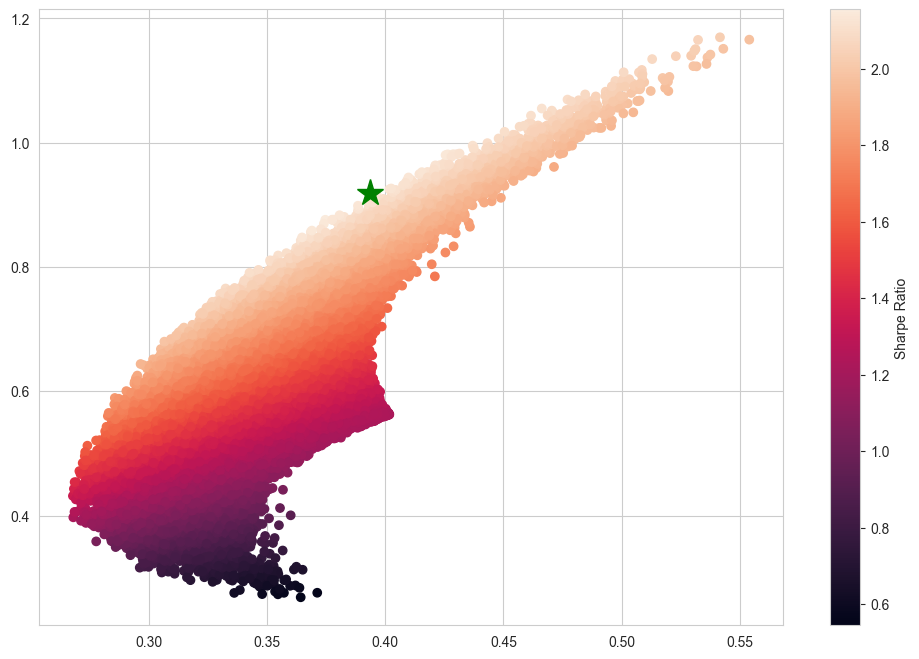

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = sharpe_ratios, marker = 'o')
plt.grid(True)
plt.xlabel = "Expected Risk"
plt.ylabel = "Expected Return"
plt.colorbar(label = "Sharpe Ratio")

plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize = 20.0)
plt.show()

In [15]:
# finding out the minimum sharpe ratio

ind = np.argmin(sharpe_ratios)

print("Minimum Sharpe Ratio = ", sharpe_ratios[ind])
print("Corresponding Return = ", portfolio_returns[ind])
print("Corresponding Risk = ", portfolio_risks[ind])

Minimum Sharpe Ratio =  0.5450313387475647
Corresponding Return =  0.26855242072689944
Corresponding Risk =  0.36429542048564745


In [16]:
# corresponding weights for our portfolio with min sharpe

for i in range(len(stocks_list)):
    print(stocks_list[i], " : ", portfolio_weights[ind][i])

YESBANK.NS  :  0.26522946079440307
GRASIM.NS  :  0.14108916807609284
JSWENERGY.NS  :  0.0032241224965012328
CIPLA.NS  :  0.004950925286541099
TCS.NS  :  0.010436942832243815
EMAMILTD.NS  :  0.575069380514218


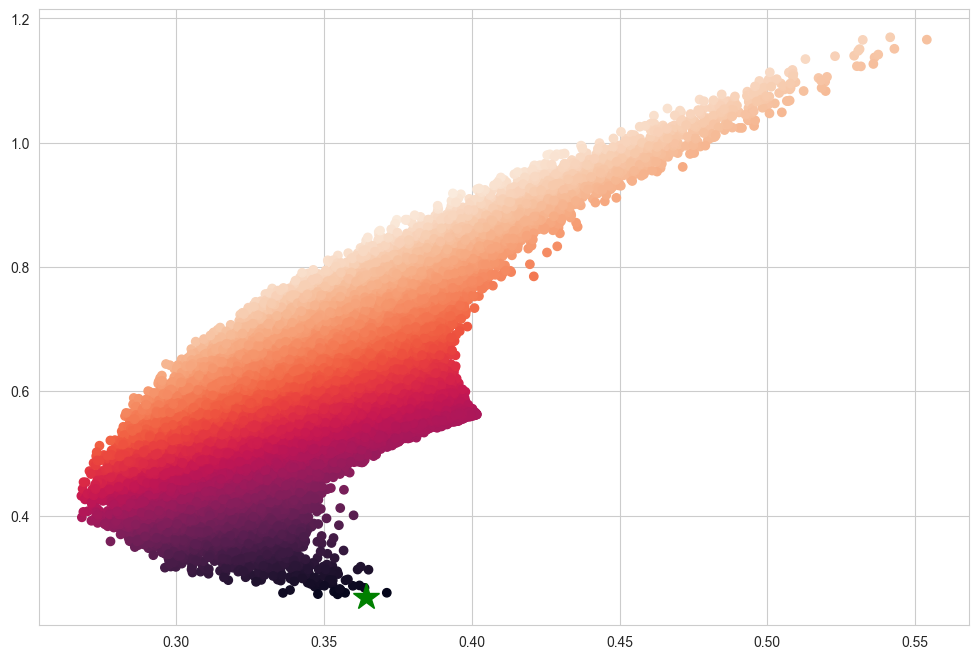

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = sharpe_ratios, marker = 'o')
plt.grid(True)
plt.xlabel = "Expected Risk"
plt.ylabel = "Expected Return"

plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize = 20.0)
plt.show()

In [18]:
print(portfolio_weights.shape)
print(stock_prices.shape)

(50000, 6)
(743, 6)


In [19]:
ind = np.argmax(sharpe_ratios)
initial_investment = 10000
first_day_prices = np.array(stock_prices.iloc[0, :])
weights = portfolio_weights[ind]
individual_value_invested = weights * initial_investment
shares = individual_value_invested / first_day_prices

for i in range(shares.shape[0]):
    print("{} - values invested : {}, shares bought : {}".format(stocks_list[i], round(individual_value_invested[i], 2), round(shares[i], 2)))

YESBANK.NS - values invested : 2029.07, shares bought : 151.99
GRASIM.NS - values invested : 2046.42, shares bought : 1.49
JSWENERGY.NS - values invested : 3471.09, shares bought : 30.7
CIPLA.NS - values invested : 2345.23, shares bought : 2.7
TCS.NS - values invested : 89.01, shares bought : 0.03
EMAMILTD.NS - values invested : 19.18, shares bought : 0.04


In [20]:
df = stock_prices.copy()
df['Portfolio Value'] = np.sum(np.array(stock_prices) * shares, axis = 1)
df

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS,Portfolio Value
Date,,,,,,,
2021-05-18 00:00:00+05:30,13.350000,1371.365967,113.080093,868.253540,2888.121338,487.685913,10000.000000
2021-05-19 00:00:00+05:30,13.300000,1368.706787,115.082817,887.446533,2881.763428,483.076141,10101.372475
2021-05-20 00:00:00+05:30,13.250000,1354.475098,114.692047,907.326904,2861.192627,475.187225,10113.295181
2021-05-21 00:00:00+05:30,13.350000,1351.126465,114.398964,909.977600,2880.360352,478.941589,10122.398959
2021-05-24 00:00:00+05:30,13.850000,1350.043091,114.203583,914.248108,2881.295898,486.212646,10202.629919
...,...,...,...,...,...,...,...
2024-05-13 00:00:00+05:30,22.250000,2385.199951,574.400024,1414.650024,3919.313721,518.900024,28535.108550
2024-05-14 00:00:00+05:30,22.549999,2372.050049,599.700012,1357.349976,3873.049805,515.299988,29181.348583
2024-05-15 00:00:00+05:30,22.600000,2369.699951,598.049988,1406.699951,3852.399902,526.900024,29267.910753


In [21]:
stock_prices

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-05-18 00:00:00+05:30,13.350000,1371.365967,113.080093,868.253540,2888.121338,487.685913
2021-05-19 00:00:00+05:30,13.300000,1368.706787,115.082817,887.446533,2881.763428,483.076141
2021-05-20 00:00:00+05:30,13.250000,1354.475098,114.692047,907.326904,2861.192627,475.187225
2021-05-21 00:00:00+05:30,13.350000,1351.126465,114.398964,909.977600,2880.360352,478.941589
2021-05-24 00:00:00+05:30,13.850000,1350.043091,114.203583,914.248108,2881.295898,486.212646
...,...,...,...,...,...,...
2024-05-13 00:00:00+05:30,22.250000,2385.199951,574.400024,1414.650024,3919.313721,518.900024
2024-05-14 00:00:00+05:30,22.549999,2372.050049,599.700012,1357.349976,3873.049805,515.299988
2024-05-15 00:00:00+05:30,22.600000,2369.699951,598.049988,1406.699951,3852.399902,526.900024
